In [1]:
import pandas as pd
pd.options.display.max_columns+100
import numpy as np
import seaborn as sns
from pandas import Series , DataFrame
import statistics
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from scipy.stats import variation
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [2]:
df=pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.shape

(7668, 15)

In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7668 non-null   object 
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 898.7+ KB


In [9]:
df['score']=df['score'].astype=('int')

In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# 5-point  Summary

In [99]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [100]:
df['year']=df['year'].astype(object)

In [101]:
df.describe()

,score,votes,budget,gross,runtime
count,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [102]:
df.describe(include=object)

,name,rating,genre,year,released,director,writer,star,country,company
count,7668,7591,7668,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,41,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,2000,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,200,9,38,37,43,5475,377


# Uni-variate Analysis

In [103]:
print('Skewed:\n')
for i in df.select_dtypes(include=np.number):
    print(i,df[i].skew())
    if df[i].skew()<0:
        print('Left skewed')
    elif df[i].skew()==0:
        print('Normally distributed')
    elif df[i].skew()>0:
        print('Right skewed')
    print('\n')

Skewed:

score -0.6044333557399534
Left skewed


votes 4.907991081656929
Right skewed


budget 2.453513476195313
Right skewed


gross 5.314389867739898
Right skewed


runtime 2.09574340198209
Right skewed




In [104]:
print('Kurtosis:\n')
for i in df.select_dtypes(include=np.number):
    print(i,df[i].kurt())
    if df[i].kurt()<0:
        print('Left kurtosis')
    elif df[i].kurt()==0:
        print('Normally distributed')
    elif df[i].kurt()>0:
        print('Right kurtosis')
    print('\n')

Kurtosis:

score 0.8926039206708509
Right kurtosis


votes 37.04206869411251
Right kurtosis


budget 7.50019065055546
Right kurtosis


gross 45.50658490821788
Right kurtosis


runtime 13.293460620475635
Right kurtosis




# Outliers

# ZSCORE

In [105]:
df_zscores=pd.DataFrame(columns=df.select_dtypes(include=np.number).columns)
for i in df.select_dtypes(include=np.number).columns:
    zscore=(df[i]-df[i].mean())/df[i].std()
    df_zscores[i]=zscore
df_zscores.head()                                                             # defferent output in IQR

,score,votes,budget,gross,runtime
0,2.074218,5.136371,-0.400168,-0.190084,2.084811
1,-0.609399,-0.141489,-0.749925,-0.118554,-0.175532
2,2.383866,6.807898,-0.424289,2.774923,0.900822
3,1.351706,0.813669,-0.774047,0.029887,-1.036616
4,0.938842,0.121792,-0.713744,-0.233243,-0.498439


In [107]:
df_zscores[(df_zscores[i]>3)|(df_zscores[i]<3)]

,score,votes,budget,gross,runtime
0,2.074218,5.136371,-0.400168,-0.190084,2.084811
1,-0.609399,-0.141489,-0.749925,-0.118554,-0.175532
2,2.383866,6.807898,-0.424289,2.774923,0.900822
3,1.351706,0.813669,-0.774047,0.029887,-1.036616
4,0.938842,0.121792,-0.713744,-0.233243,-0.498439
...,...,...,...,...,...
7662,NaN,NaN,-0.858230,NaN,-0.928980
7663,-3.396232,-0.539361,-0.858302,NaN,-0.928980
7664,-1.744775,-0.539251,NaN,NaN,-0.928980
7666,NaN,NaN,-0.858109,NaN,0.685551


#  IQR

In [110]:
print('No of Outliers in each column:') # different in ul, ll
for i in df.select_dtypes(include=np.number).columns:
    print(i,df_zscores[(df_zscores[i]>3)|(df_zscores[i]<-3)][[i]].shape[0])

Outliers in each column:
score 59
votes 175
budget 151
gross 169
runtime 106


In [109]:
print('No ofOutliers in each column:')
for i in df.select_dtypes(include=np.number).columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    print(i,df[(df[i]>ul)|(df[i]<ll)][[i]].shape[0])

Outliers in each column:
score 119
votes 803
budget 445
gross 851
runtime 240


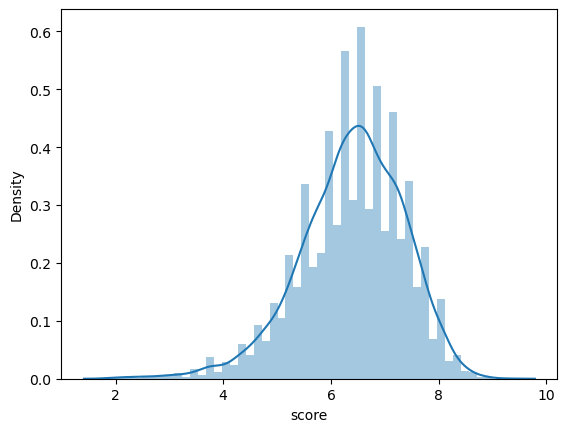

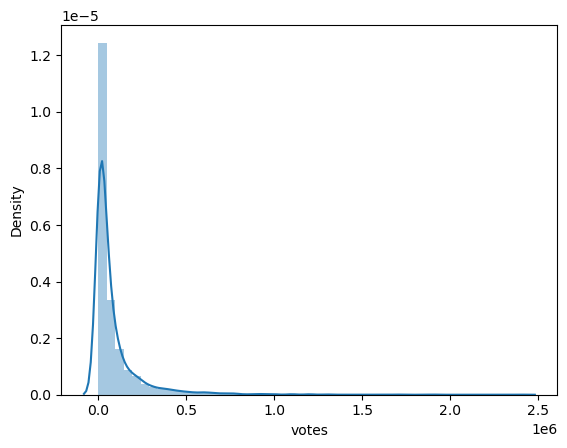

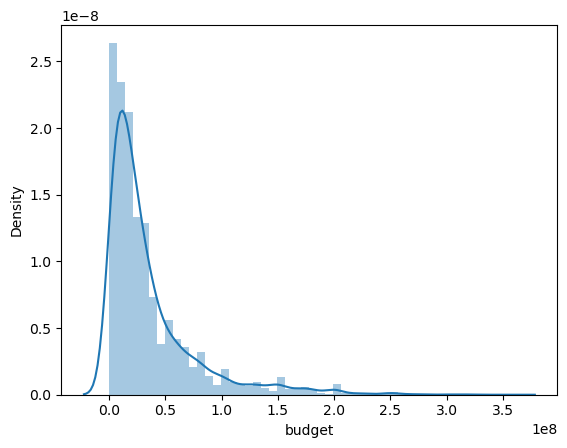

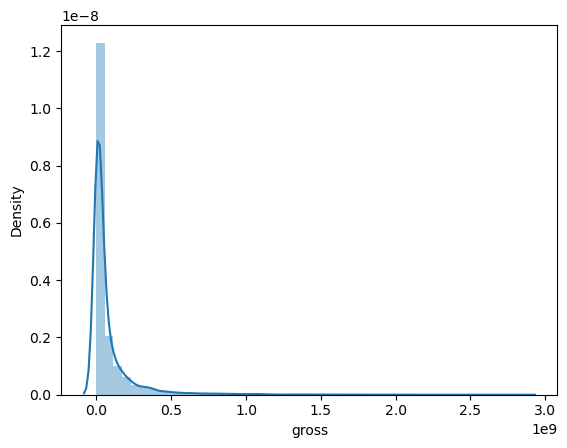

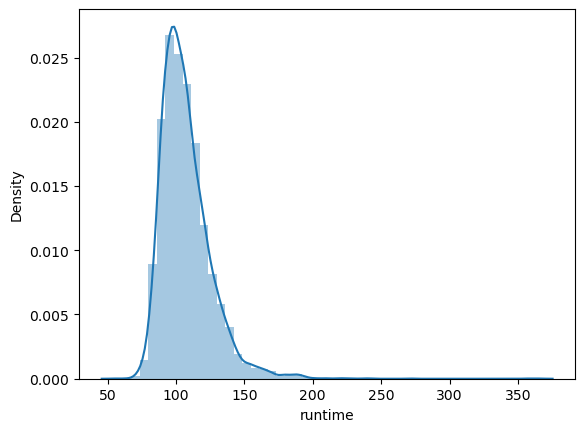

In [112]:
for i in df.select_dtypes(include=np.number).columns:
    sns.distplot(df[i])
    plt.show()

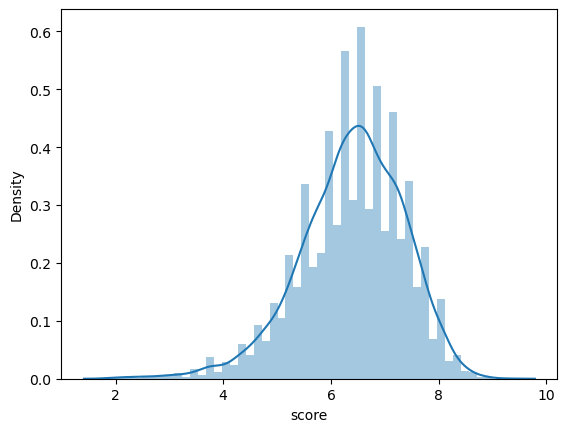

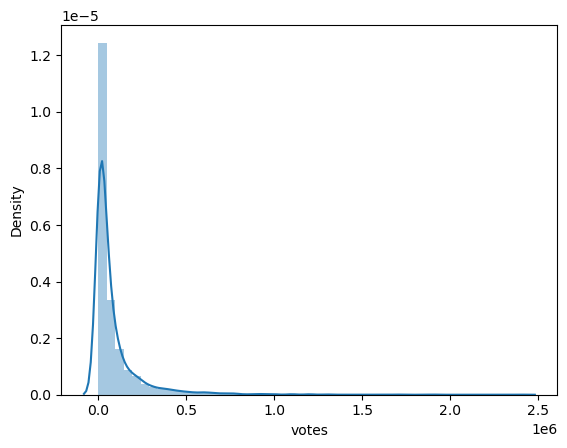

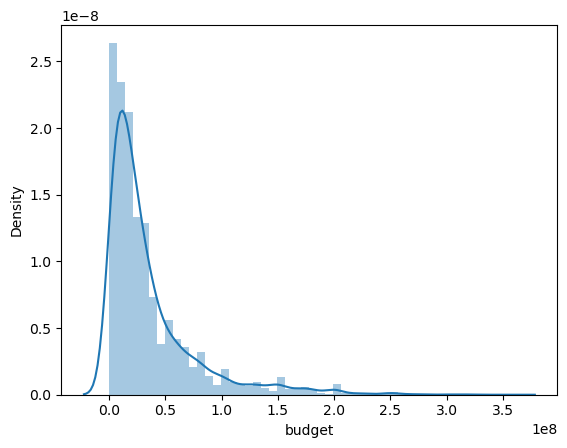

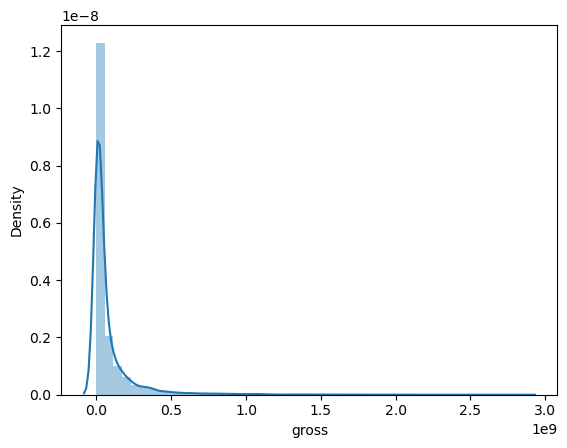

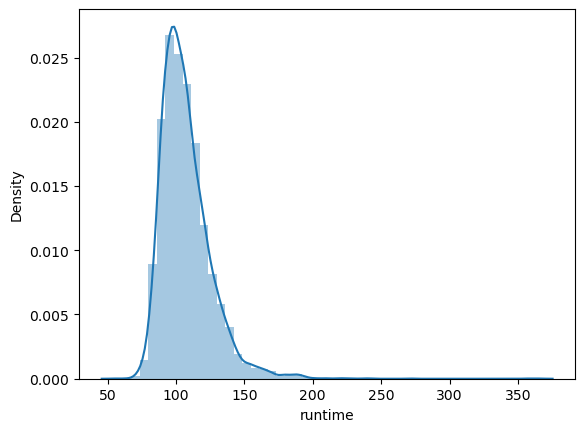

In [117]:
for i in df.select_dtypes(include=np.number).columns:
    sns.distplot(df[i]).plot(kind='kde')
    plt.show()

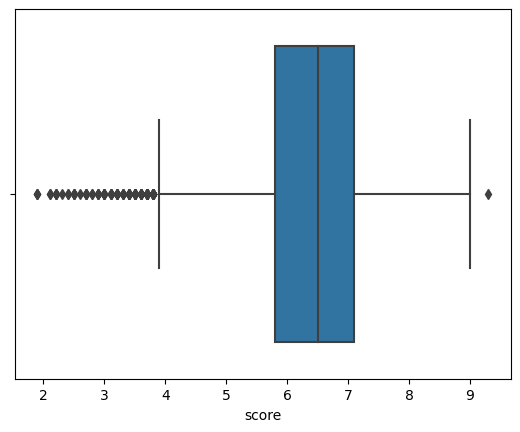

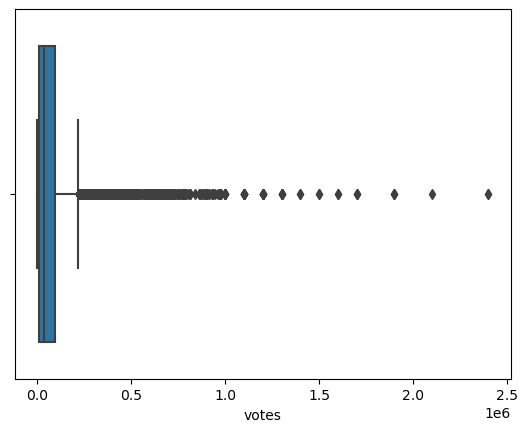

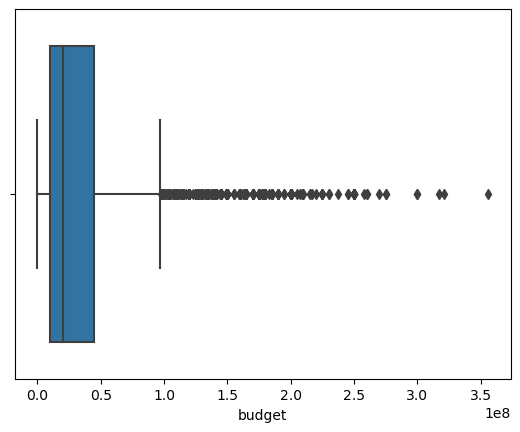

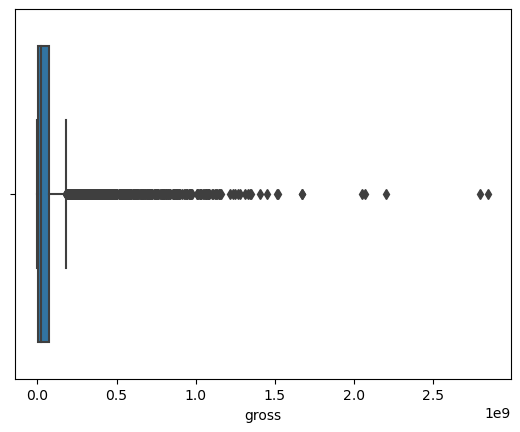

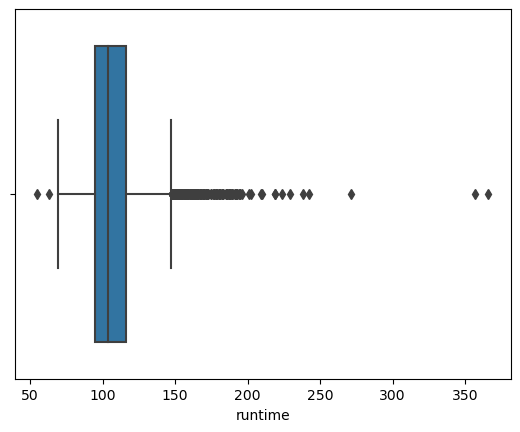

In [116]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
for i in df.select_dtypes(include=object):
    print[i]
    print(df[i].value_counts())
    print('n\')

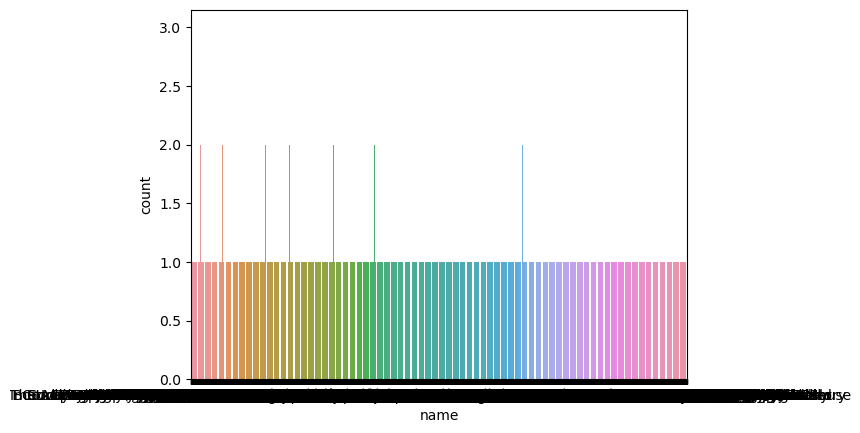

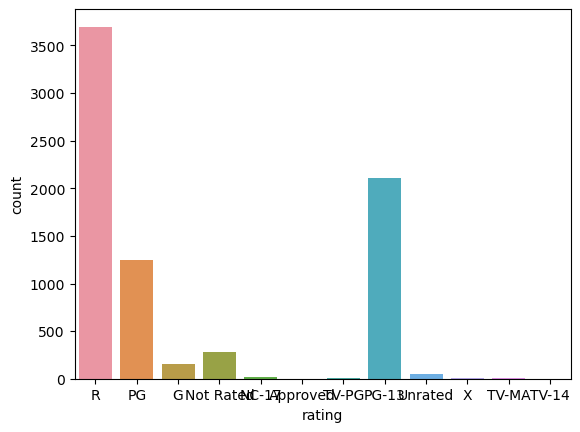

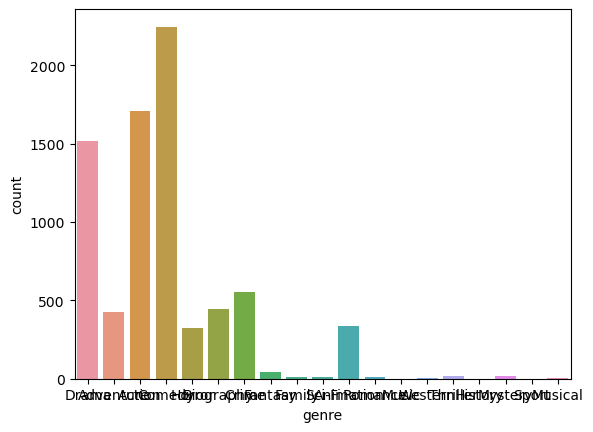

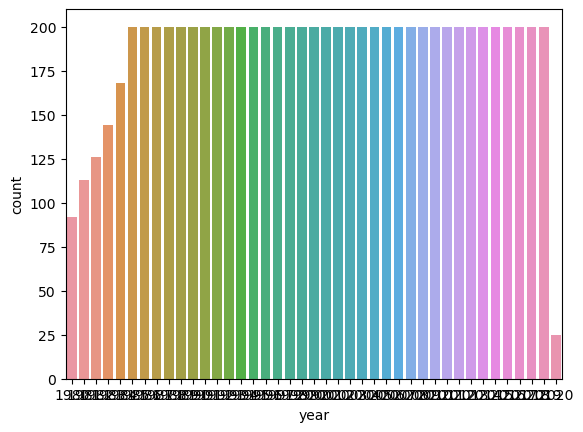

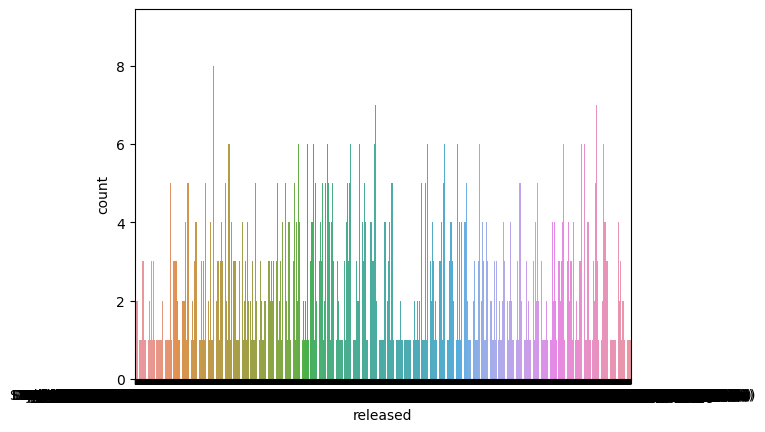

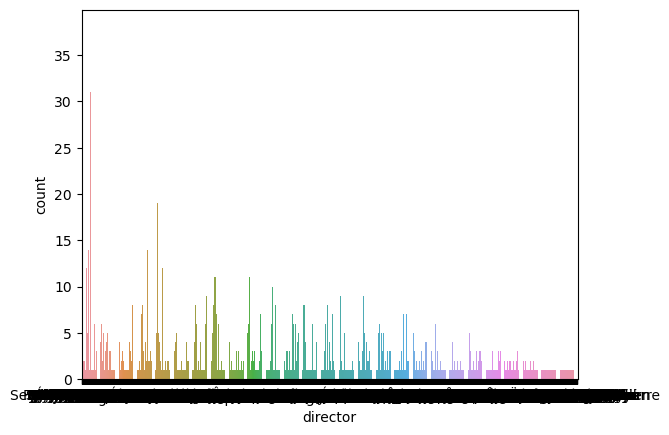

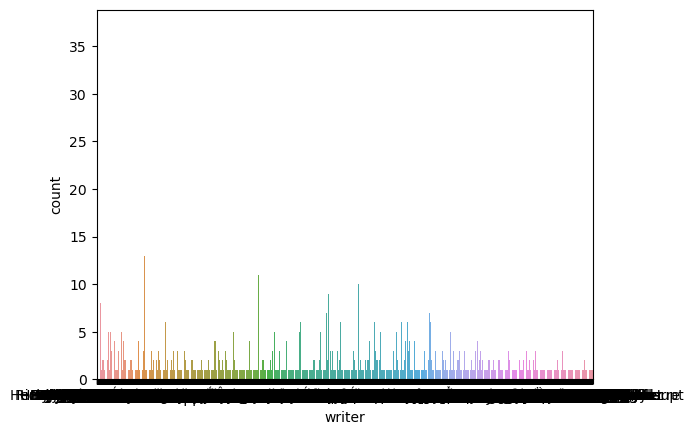

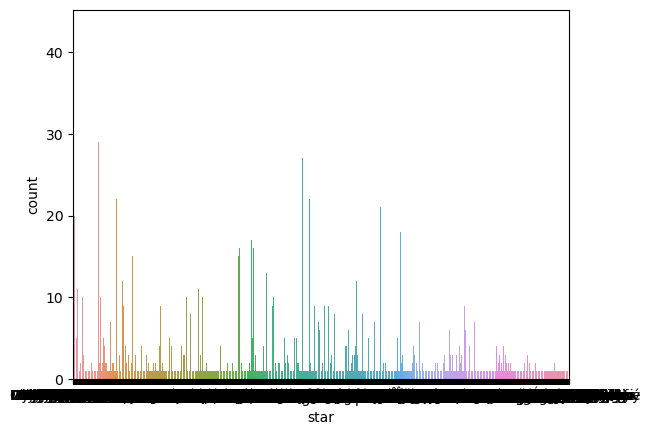

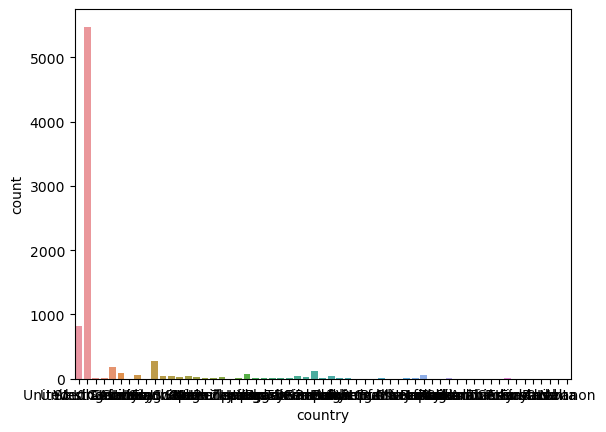

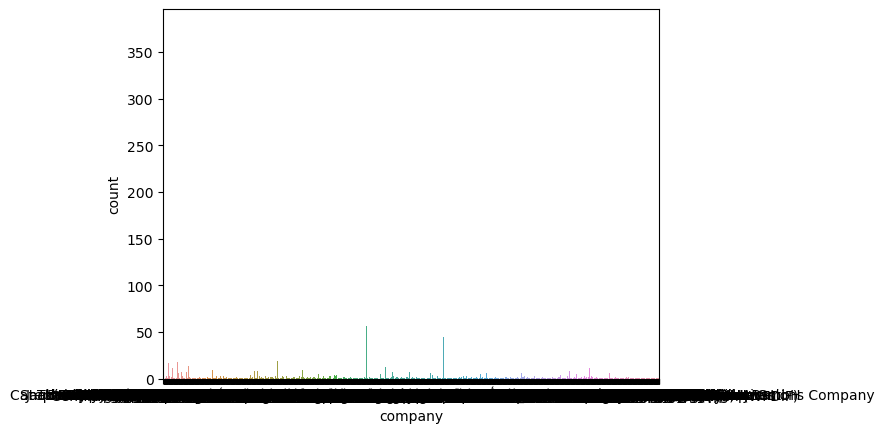

In [118]:
for i in df.select_dtypes(include=object):
    sns.countplot(df[i])
    plt.show()

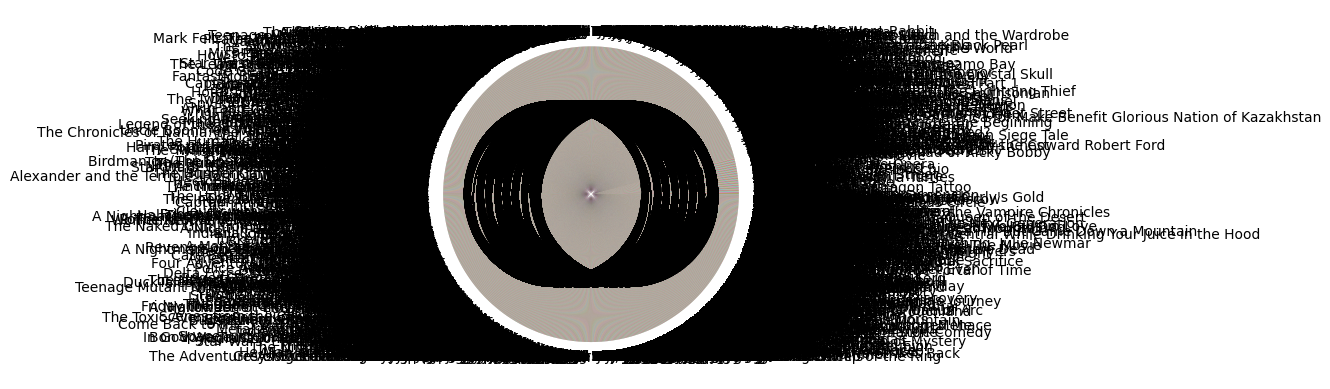

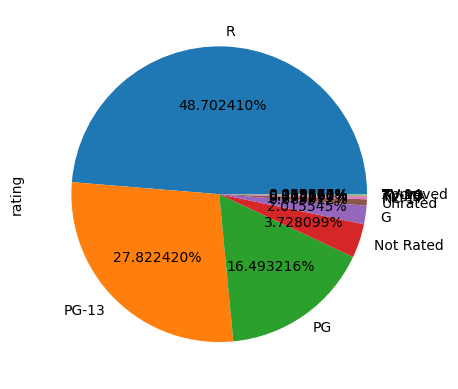

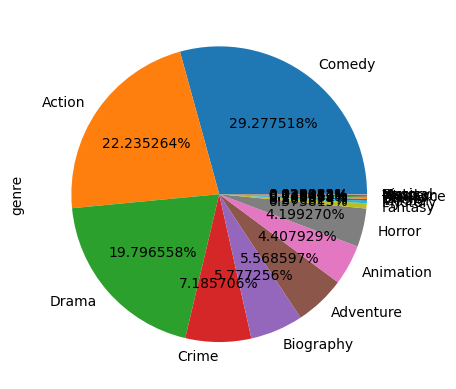

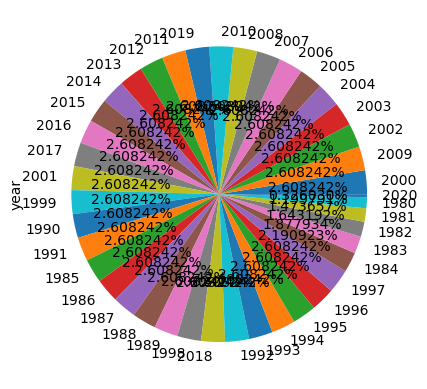

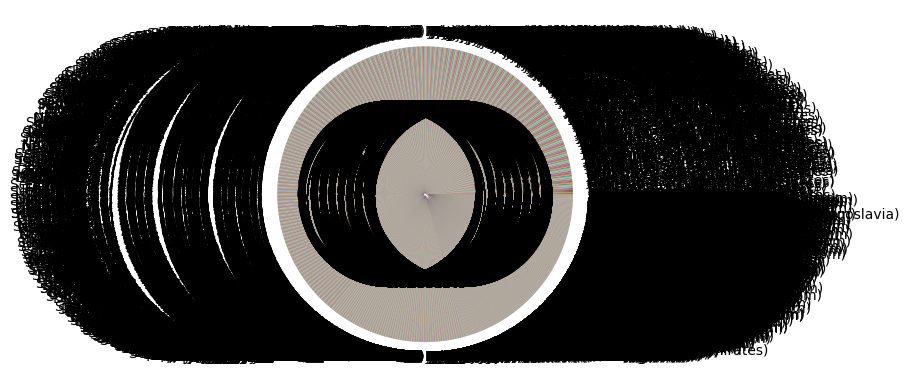

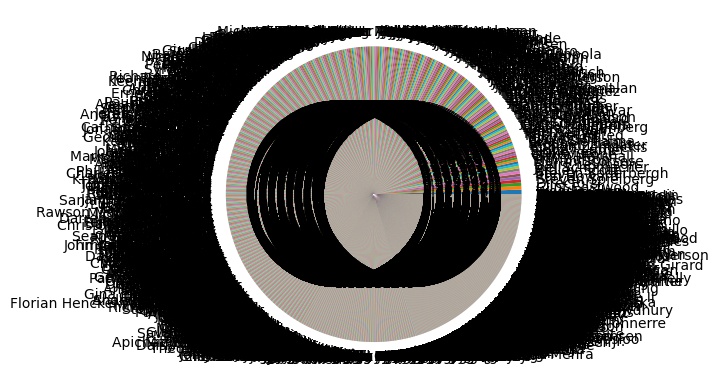

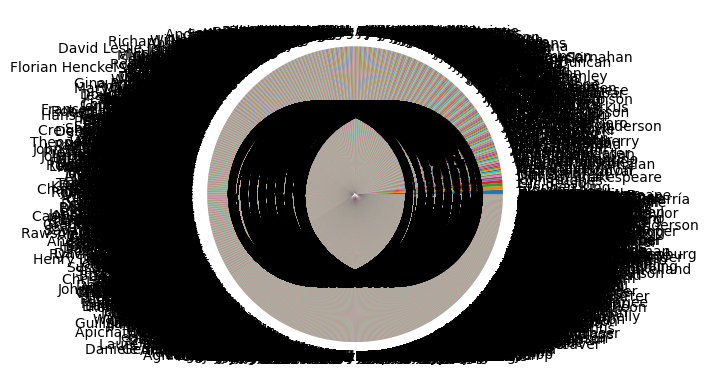

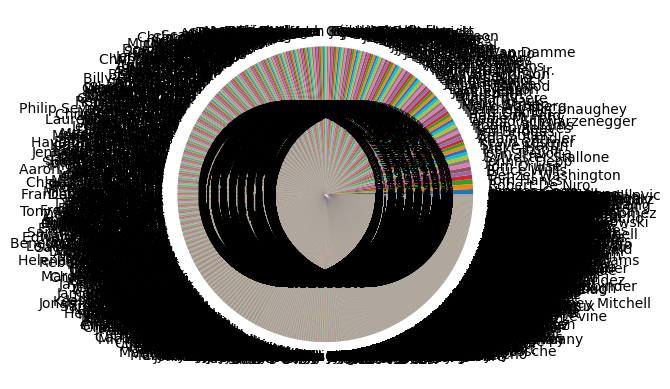

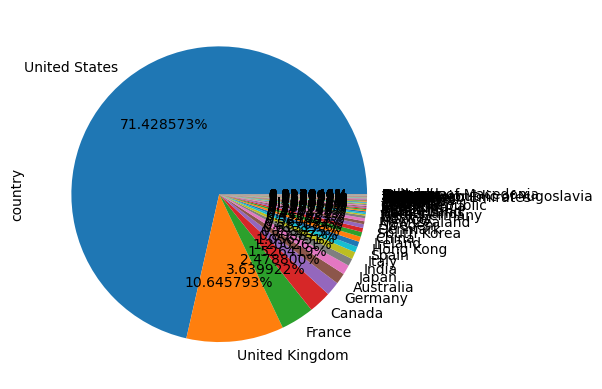

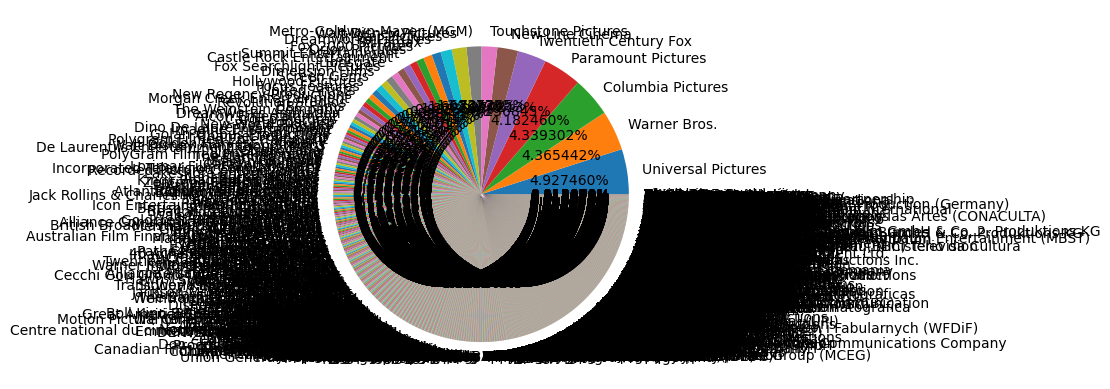

In [120]:
for i in df.select_dtypes(include=object).columns:
    df[i].value_counts().plot(kind='pie',autopct='%2f%%')
    plt.show()